# Programming Assignment 3 - Polynomial Regression (100 points)

In [1]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, preprocessing
import numpy.polynomial.polynomial as poly
%matplotlib inline

# Importing Data 
Import data from poly_regression.csv

In [2]:
# TODO - Read the poly_regression.csv and import the first column in X and the second column in y - 10 points
df= pd.read_csv('poly_regression.csv',na_values='?')
data = df.dropna()
X = np.array(data.loc[:, '# x'])
y = np.array(data.loc[:, ' y'])
print(X)
print(y)

[-0.65 -0.78 -0.39  0.69  0.37 -0.98 -0.15  0.95 -0.9   0.16 -0.9  -0.35
  0.43 -0.24 -0.71  0.48  0.11 -0.87 -0.44 -0.41 -0.49 -0.41 -0.96 -0.05
  0.98  0.38  0.07 -0.13 -0.71  0.05  0.66 -0.76  0.99 -0.44  0.5  -0.75
  0.64 -0.37  0.15  0.85  0.37  0.65  0.49  0.01 -0.4   0.31 -0.34 -0.57
  1.    0.41 -0.49 -0.33 -0.54  0.75 -0.2   0.3   0.41 -0.84  0.84  0.9
 -0.08 -0.49  0.8   0.98 -0.61  0.13  0.11 -0.5   0.76  0.5   0.66  0.63
  0.55  0.14  0.2   0.13  0.82 -0.1  -0.75 -0.67  0.3  -0.57  0.58  0.93
  0.43 -0.38 -0.18 -0.57 -0.49 -0.91 -0.42  0.7   0.23 -0.21  0.32 -0.1
 -0.02  0.61  0.82 -0.1  -0.36  0.48  0.    0.83  0.54 -0.31  0.36  0.88
 -0.24 -0.06 -0.21 -0.5   0.2  -0.69  0.62 -0.18 -0.86 -0.45  0.49  0.66
 -0.73 -0.02  0.57  0.37 -0.57 -0.8  -0.21 -0.64 -1.   -0.71 -0.74 -0.95
  0.05 -0.99  0.31  0.32 -0.63 -0.86  0.24 -0.7   0.76 -0.45  0.04 -0.63
  0.5   0.23 -0.76  0.05  0.46 -0.83 -0.74 -0.92  0.62 -0.1  -0.45  0.03
 -0.89  0.59 -0.65  0.81  0.42 -0.12 -0.59  0.12  0.0

In [3]:
# TODO - Reshape X and y to be rank 2 matrices - 5 points
X = X.reshape((1,X.shape[0]))
y = y.reshape((1,y.shape[0]))

# Training and Validation Set
Divide the dataset approximately into 2 equal parts : training set and validation set. 

In [4]:
# TODO - Save the first 100 rows in X_tr and y_tr and the next 100 in X_val and y_val - 5 points
# Don't shuffle becasue this is a homework assignment
X_tr = X[0][:100]
y_tr = y[0][:100]
X_val = X[0][100:]
y_val = y[0][100:]

# Plotting Dataset

(100,)
(100,)


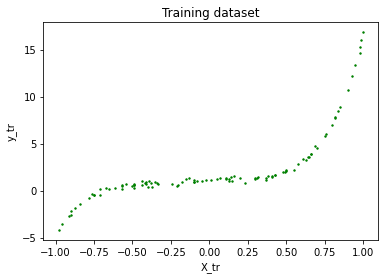

In [5]:
# Plot X_tr versus y_tr
print(X_tr.shape)
print(y_tr.shape)
plt.scatter(X_tr,y_tr,c='g',s=2)
plt.title("Training dataset")
plt.xlabel('X_tr')
plt.ylabel('y_tr')
plt.show()

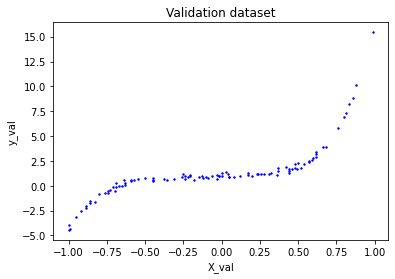

In [6]:
# Plot X_val versus y_val
plt.scatter(X_val,y_val,c='b',s=2)
plt.title("Validation dataset")
plt.xlabel('X_val')
plt.ylabel('y_val')
plt.show()

# Model Selection.
Write code to obtain polynomial regression models of different orders starting from linear regression i.e. degree = 1 to higher degree models like degree = 2 to 10. Find training and validation error for every order and plot these errors v/s degree. Select the order that fits the data best based on validation error. You can use poly.polyval method from numpy to find coefficients of the different models.

In [17]:
# TODO - Plot the training dataset and the hypothesis function for degrees = 1, 2, 3,..., 10 - 55 points
# TODO - Record the training and validation error for each degree - 5 points 
# HINT - Use poly.polyfit to find the theta values and poly.polyval to find the yhat values

validationcosts = []
traincosts = []
for d in range(1,10):
    thetas = np.polyfit(X_tr, y_tr, d)
    yhatTrain = np.polyval(thetas, X_tr)
    yhatVal = np.polyval(thetas, X_val)
    costTrain = (.5)*np.mean((yhatTrain - y_tr)**2)
    costVal = (.5)*np.mean((yhatVal - y_tr)**2)
    traincosts.append(costTrain)
    validationcosts.append(costVal)

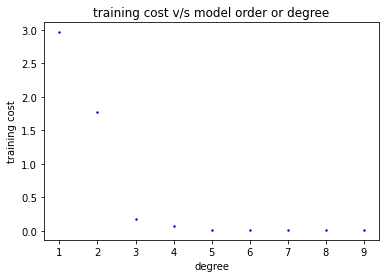

In [10]:
# TODO - Plot training cost v/s model order or degree - 10 points
deg = np.arange(1,10)
plt.scatter(deg,traincosts,c='b',s=2)
plt.title("training cost v/s model order or degree")
plt.xlabel('degree')
plt.ylabel('training cost')
plt.show()

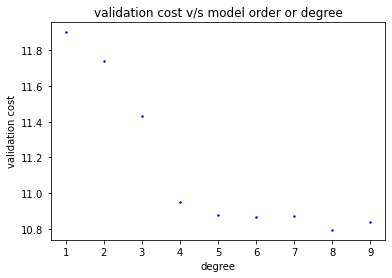

In [115]:
# TODO - Plot validation cost v/s model order or degree - 10 points
deg = np.arange(1,10)
plt.scatter(deg,validationcosts,c='b',s=2)
plt.title("validation cost v/s model order or degree")
plt.xlabel('degree')
plt.ylabel('validation cost')
plt.show()